# Project: Books on Goodreads

# Introduction to the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset into a dataframe
data = pd.read_csv('goodreads.csv')

In [3]:
# exploring the dataset
data.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105


In [4]:
# dropping rows which won't be used in analysis. 
# all required genre information for each book can be found in the genre_1 and genre_2 columns
data = data.drop(['author_genres', 'author_page_url', 'book_fullurl', 'score'], axis=1)

In [5]:
# exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22891 entries, 0 to 22890
Data columns (total 16 columns):
author_average_rating    22891 non-null float64
author_gender            22891 non-null object
author_id                22891 non-null int64
author_name              22891 non-null object
author_rating_count      22891 non-null int64
author_review_count      22891 non-null int64
birthplace               22891 non-null object
book_average_rating      22891 non-null float64
book_id                  22891 non-null object
book_title               22891 non-null object
genre_1                  22891 non-null object
genre_2                  22891 non-null object
num_ratings              22891 non-null int64
num_reviews              22891 non-null int64
pages                    22891 non-null object
publish_date             22610 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 2.8+ MB


In [6]:
# checking the initial amount of missing values
data.isnull().sum()

author_average_rating      0
author_gender              0
author_id                  0
author_name                0
author_rating_count        0
author_review_count        0
birthplace                 0
book_average_rating        0
book_id                    0
book_title                 0
genre_1                    0
genre_2                    0
num_ratings                0
num_reviews                0
pages                      0
publish_date             281
dtype: int64

# Data Cleaning: Initial observations and data type conversion

In [7]:
# converting the pages column to a numeric format
data.pages = pd.to_numeric(data.pages, errors='coerce')

# converting the author_id to a string
data.author_id = data.author_id.astype(str)

In [8]:
# checking to see if missing values were introduced
data.isnull().sum()

author_average_rating      0
author_gender              0
author_id                  0
author_name                0
author_rating_count        0
author_review_count        0
birthplace                 0
book_average_rating        0
book_id                    0
book_title                 0
genre_1                    0
genre_2                    0
num_ratings                0
num_reviews                0
pages                      3
publish_date             281
dtype: int64

In [9]:
# dropping the 281 rows containing a page count of 0
data = data.dropna(subset=['pages'])

In [10]:
# capitalizing the genders in the author_gender column
data.author_gender = data.author_gender.map({'male': 'Male', 'female': 'Female'})

In [11]:
data.head()

,author_average_rating,author_gender,author_id,author_name,author_rating_count,author_review_count,birthplace,book_average_rating,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date
0,4.01,Female,74489,Victoria Thompson\n,74399,6268,United States\n,4.02,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277.0,2000
1,4.15,Male,706255,Stieg Larsson\n,3726435,142704,Sweden\n,4.13,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465.0,August 2005
2,4.00,Female,5618190,Mimi Jean Pamfiloff\n,76496,7975,United States\n,3.99,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354.0,2016
3,3.88,Male,37871,José Donoso\n,5522,489,Chile\n,4.14,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438.0,1970
4,4.10,Female,36122,Patricia C. Wrede\n,291013,13453,United States\n,4.01,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326.0,April 15th 1988


# Data Cleaning: The author_name, birthplace and book_title columns

In [12]:
data.author_name.head()

0      Victoria Thompson\n
1          Stieg Larsson\n
2    Mimi Jean Pamfiloff\n
3            José Donoso\n
4      Patricia C. Wrede\n
Name: author_name, dtype: object

In [13]:
data.birthplace.head()

0     United States\n    
1            Sweden\n    
2       United States\n  
3             Chile\n    
4     United States\n    
Name: birthplace, dtype: object

In [14]:
data.book_title.head()

0                 \n      Murder on St. Mark's Place\n
1            \n      The Girl with the Dragon Tattoo\n
2                       \n      Tailored for Trouble\n
3                  \n      The Obscene Bird of Night\n
4    \n      Sorcery & Cecelia: or The Enchanted Ch...
Name: book_title, dtype: object

In [15]:
# stripping whitespace and removing newline characters from the author_name, birthplace and book_title columns
data.author_name = data.author_name.str.replace('\n', '').str.strip()
data.birthplace = data.birthplace.str.replace('\n', '').str.strip()
data.book_title = data.book_title.str.replace('\n', '').str.strip()

In [16]:
data.head()

,author_average_rating,author_gender,author_id,author_name,author_rating_count,author_review_count,birthplace,book_average_rating,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date
0,4.01,Female,74489,Victoria Thompson,74399,6268,United States,4.02,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277.0,2000
1,4.15,Male,706255,Stieg Larsson,3726435,142704,Sweden,4.13,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465.0,August 2005
2,4.00,Female,5618190,Mimi Jean Pamfiloff,76496,7975,United States,3.99,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354.0,2016
3,3.88,Male,37871,José Donoso,5522,489,Chile,4.14,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438.0,1970
4,4.10,Female,36122,Patricia C. Wrede,291013,13453,United States,4.01,64207,Sorcery & Cecelia: or The Enchanted Chocolate Pot,Fantasy,Young Adult,17051,1890,326.0,April 15th 1988


# Data Cleaning: The genre_1 and genre_2 columns 

In [17]:
# stripping whitespace and removing newline characters from the genre_1 and genre_2 columns
data.genre_1 = data.genre_1.str.replace('\n', '').str.strip()
data.genre_2 = data.genre_2.str.replace('\n', '').str.strip()

In [18]:
data.loc[data.genre_1.str.contains('Romance|romance'), 'genre_1'] = 'Romance'
data.loc[data.genre_1.str.contains('Fantasy|fantasy'), 'genre_1'] = 'Fantasy'
data.loc[data.genre_1.str.contains('Young|young'), 'genre_1'] = 'Young Adult'
data.loc[data.genre_1.str.contains('LGBT|Lgbt|lgbt|GLBT|Glbt|glbt|Gay|gay|Lesbian|lesbian'), 'genre_1'] = 'LGBT'

data.loc[data.genre_2.str.contains('Romance|romance'), 'genre_2'] = 'Romance'
data.loc[data.genre_2.str.contains('Fantasy|fantasy'), 'genre_2'] = 'Fantasy'
data.loc[data.genre_2.str.contains('Young|young'), 'genre_2'] = 'Young Adult'
data.loc[data.genre_2.str.contains('LGBT|Lgbt|lgbt|GLBT|Glbl|glbt|Gay|gay|Lesbian|lesbian'), 'genre_2'] = 'LGBT'

In [19]:
# checking how many rows have genre_2 = 'See top shelves...' (which has no value for analysis)
len(data[data.genre_2 == 'See top shelves…'])

717

In [20]:
# replacing the genre_2 value 'See top shelves...' with the value in genre_1 for that row
for i in range(len(data)):
    if data['genre_2'].values[i] == 'See top shelves…':
        data['genre_2'].values[i] = data['genre_1'].values[i]

In [21]:
# checking how many rows have genre_2 = 'See top shelves...' after cleaning 
len(data[data.genre_2 == 'See top shelves…'])

0

# Data Cleaning: The publish_date column

In [22]:
# extracting the year from publish_date and assign it to year_published
data['year_published'] = data.publish_date.str.extract(r'([1-2][0-9]{3})')

# converting the dates to numerical format (I won't be using datetime objects)
data.year_published = pd.to_numeric(data.year_published, errors='coerce')

# dropping the publish date column
data.drop(['publish_date'], axis=1, inplace=True)

In [23]:
data.head()

,author_average_rating,author_gender,author_id,author_name,author_rating_count,author_review_count,birthplace,book_average_rating,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,year_published
0,4.01,Female,74489,Victoria Thompson,74399,6268,United States,4.02,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277.0,2000.0
1,4.15,Male,706255,Stieg Larsson,3726435,142704,Sweden,4.13,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465.0,2005.0
2,4.00,Female,5618190,Mimi Jean Pamfiloff,76496,7975,United States,3.99,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354.0,2016.0
3,3.88,Male,37871,José Donoso,5522,489,Chile,4.14,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438.0,1970.0
4,4.10,Female,36122,Patricia C. Wrede,291013,13453,United States,4.01,64207,Sorcery & Cecelia: or The Enchanted Chocolate Pot,Fantasy,Young Adult,17051,1890,326.0,1988.0


In [24]:
data.isnull().sum()

author_average_rating      0
author_gender              0
author_id                  0
author_name                0
author_rating_count        0
author_review_count        0
birthplace                 0
book_average_rating        0
book_id                    0
book_title                 0
genre_1                    0
genre_2                    0
num_ratings                0
num_reviews                0
pages                      0
year_published           812
dtype: int64

In [25]:
missing_year_published = data.isnull().sum().year_published
print('Rows with missing values in year_published make up {:.2f}% of the dataset'.format(missing_year_published/len(data)*100))

Rows with missing values in year_published make up 3.55% of the dataset


In [26]:
# dropping missing values in year_published
data = data.dropna(subset=['year_published'])

# Data Cleaning: The pages column 

In [27]:
data.describe()

,author_average_rating,author_rating_count,author_review_count,book_average_rating,num_ratings,num_reviews,pages,year_published
count,22076.000000,2.207600e+04,22076.000000,22076.000000,2.207600e+04,22076.00000,22076.000000,22076.000000
mean,3.958893,1.751314e+05,9507.618047,3.948486,4.737813e+04,2358.47803,333.384535,1997.152473
std,0.237342,6.645103e+05,25209.765493,0.285990,1.820694e+05,6902.46036,219.742050,48.500659
min,1.820000,6.000000e+00,0.000000,1.850000,1.000000e+00,0.00000,0.000000,1002.000000
25%,3.810000,4.544000e+03,570.000000,3.770000,8.890000e+02,111.00000,238.000000,2000.000000
50%,3.970000,2.546750e+04,2323.000000,3.960000,4.564000e+03,396.00000,316.000000,2011.000000
75%,4.110000,1.133192e+05,8412.500000,4.140000,2.076525e+04,1531.00000,384.000000,2013.000000
max,5.000000,2.111732e+07,516745.000000,5.000000,3.820921e+06,147696.00000,6680.000000,2019.000000


In [28]:
# checking how many books have 0 pages
len(data[data.pages == 0])

33

In [29]:
# dropping the rows representing books with 0 pages
data.drop(data[data.pages == 0].index, inplace=True)

# Data Cleaning: The book_id column

In [30]:
data.shape

(22043, 16)

In [31]:
# checking to see how many duplicate books are in the dataset
duplicate_books = data.duplicated(subset=['book_id'], keep='first').value_counts()
duplicate_books

False    16184
True      5859
dtype: int64

In [32]:
print('Duplicate books make up {:.2f}% of the dataset.'.format(duplicate_books[True]/data.shape[0]*100))

Duplicate books make up 26.58% of the dataset.


In [33]:
# keeping only unique book_ids and filtering out the rest using a boolean mask
duplicate_books_id_mask = data.duplicated(subset=['book_id'], keep='first')
data = data[~duplicate_books_id_mask]

# Data Cleaning: Conclusion 

In [34]:
data.isnull().sum()

author_average_rating    0
author_gender            0
author_id                0
author_name              0
author_rating_count      0
author_review_count      0
birthplace               0
book_average_rating      0
book_id                  0
book_title               0
genre_1                  0
genre_2                  0
num_ratings              0
num_reviews              0
pages                    0
year_published           0
dtype: int64

In [35]:
data.shape

(16184, 16)

In [36]:
data.head()

,author_average_rating,author_gender,author_id,author_name,author_rating_count,author_review_count,birthplace,book_average_rating,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,year_published
0,4.01,Female,74489,Victoria Thompson,74399,6268,United States,4.02,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277.0,2000.0
1,4.15,Male,706255,Stieg Larsson,3726435,142704,Sweden,4.13,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465.0,2005.0
2,4.00,Female,5618190,Mimi Jean Pamfiloff,76496,7975,United States,3.99,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354.0,2016.0
3,3.88,Male,37871,José Donoso,5522,489,Chile,4.14,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438.0,1970.0
4,4.10,Female,36122,Patricia C. Wrede,291013,13453,United States,4.01,64207,Sorcery & Cecelia: or The Enchanted Chocolate Pot,Fantasy,Young Adult,17051,1890,326.0,1988.0



# Data Analysis: Author Gender

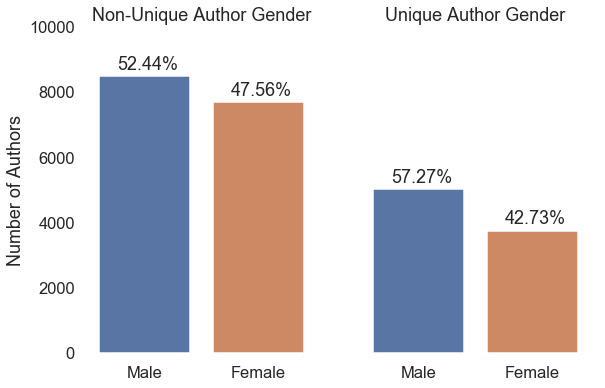

In [48]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(9, 6))

sns.set_style('white')
sns.set_context('talk')

# first subplot for the non-unique author genders

sns.countplot(x='author_gender', data=data, order=['Male', 'Female'], palette='deep', ax=ax0)

ax0.set(
    title='Non-Unique Author Gender',
    xlabel='',
    ylabel='Number of Authors',
    ylim=(0, 10000)
)

totals = []
for i in ax0.patches:
    totals.append(i.get_height())
    
total = sum(totals)
for i in ax0.patches:
    ax0.text(
        i.get_x()+0.16,
        i.get_height()+200,
        str(round(i.get_height()/total*100, 2)) + '%'
    )

for key, spine in ax0.spines.items():
    spine.set_visible(False)

# second subplot for the unique author genders

duplicated_author_id_mask = data.duplicated(subset=['author_id'], keep=False)
data_unique_authors = data[~duplicated_author_id_mask]

sns.countplot(x='author_gender', data=data_unique_authors, order=['Male', 'Female'], palette='deep', ax=ax1)

ax1.set(
    title='Unique Author Gender',
    xlabel='',
    ylabel=''
)

totals = []
for i in ax1.patches:
    totals.append(i.get_height())
    
total = sum(totals)
for i in ax1.patches:
    ax1.text(
        i.get_x()+0.16,
        i.get_height()+200,
        str(round(i.get_height()/total*100, 2)) + '%'
    )
    
for key, spine in ax1.spines.items():
    spine.set_visible(False)

# Data Analysis: The Most Popular Genres

In [38]:
top_25_genre_1 = list(data.genre_1.value_counts().head(25).index)
top_25_genre_2 = list(data.genre_2.value_counts().head(25).index)

# creating two dataframes containing only books written in one of the top 25 genres for genre_1 and genre_2

data_top_25_genre_1 = data[data.genre_1.isin(top_25_genre_1)].copy()
data_top_25_genre_2 = data[data.genre_2.isin(top_25_genre_2)].copy()

In [39]:
len_top_25_genre_1 = len(data_top_25_genre_1)
len_all_genre_1 = len(data)
percentage_top_25_genre_1 = len_top_25_genre_1 / len_all_genre_1 * 100
print('The top 25 genres in genre_1 make up {:.2f}% of all the genres in genre_1.\n'.format(percentage_top_25_genre_1))

The top 25 genres in genre_1 make up 89.66% of all the genres in genre_1.



In [40]:
len_top_25_genre_2 = len(data_top_25_genre_2)
len_all_genre_2 = len(data)
percentage_top_25_genre_2 = len_top_25_genre_2 / len_all_genre_2 * 100
print('The top 25 genres in genre_2 make up {:.2f}% of all the genres in genre_2.'.format(percentage_top_25_genre_2))

The top 25 genres in genre_2 make up 85.20% of all the genres in genre_2.


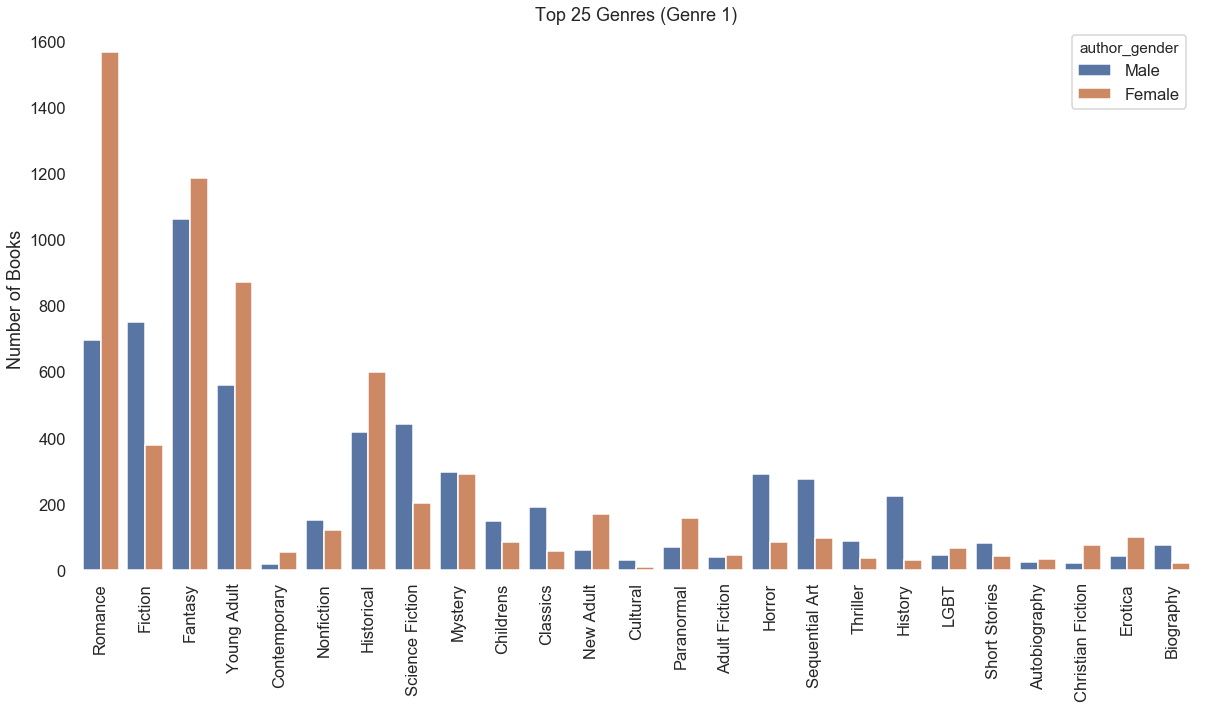

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.set_style('white')
sns.set_context('talk')
sns.countplot(x='genre_1', 
              hue='author_gender', 
              hue_order=['Male', 'Female'],
              data=data_top_25_genre_2,
              order=data_top_25_genre_2.genre_2.value_counts().index,
              palette='deep',
              ax=ax)
plt.title('Top 25 Genres (Genre 1)')
plt.ylabel('Number of Books')
plt.xlabel('')

for key, spine in ax.spines.items():
    spine.set_visible(False)

In [42]:
top_5_genre_1 = (data_top_25_genre_1.groupby(['genre_1', 'author_gender'])
                 .agg(['count'])['book_id']
                 .sort_values(by=['count'], ascending=False)
                 .head(5)
                )

top_5_genre_1

count
genre_1     author_gender       
Romance     Female          1806
Fantasy     Female          1230
            Male            1137
Young Adult Female           949
Fiction     Male             949

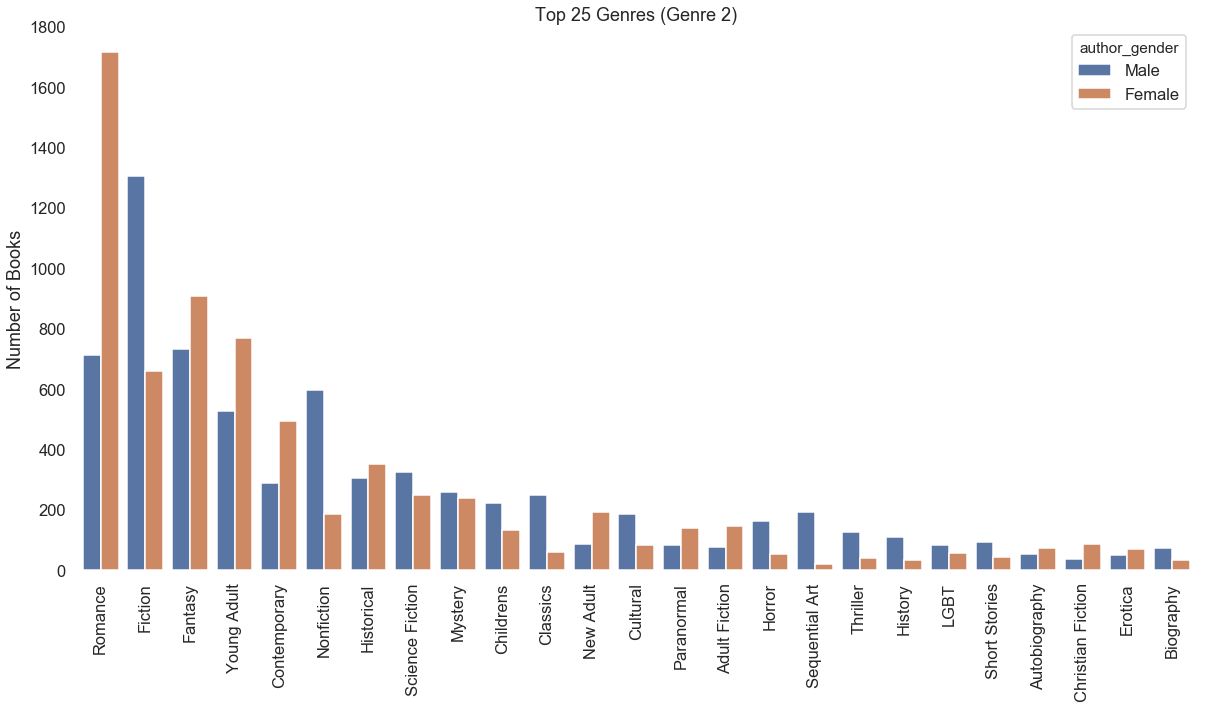

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.set_style('white')
sns.set_context('talk')
sns.countplot(x='genre_2', 
              hue='author_gender', 
              hue_order=['Male', 'Female'],
              data=data_top_25_genre_2,
              order=data_top_25_genre_2.genre_2.value_counts().index,
              palette='deep',
              ax=ax)
plt.title('Top 25 Genres (Genre 2)')
plt.ylabel('Number of Books')
plt.xlabel('')

for key, spine in ax.spines.items():
    spine.set_visible(False)

In [44]:
top_5_genre_2 = (data_top_25_genre_2.groupby(['genre_2', 'author_gender'])
                 .agg(['count'])['book_id']
                 .sort_values(by=['count'], ascending=False)
                 .head(5)
                )

top_5_genre_2

,,count
genre_2,author_gender,
Romance,Female,1714
Fiction,Male,1304
Fantasy,Female,909
Young Adult,Female,769
Fantasy,Male,732


# Data Analysis: Average Book Rating

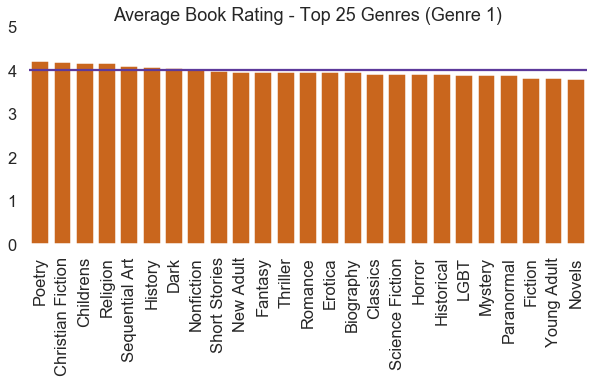

In [45]:
top_25_genre_1_pv = data_top_25_genre_1.pivot_table('book_average_rating', index='genre_1', 
                                                    aggfunc='mean').sort_values(by='book_average_rating', ascending=False)

fig, ax = plt.subplots(figsize=(10,4))

sns.set_style('white')

sns.barplot(x=top_25_genre_1_pv.index, 
            y=top_25_genre_1_pv['book_average_rating'], 
            data=top_25_genre_1_pv,
            color='#E66100',
            ax=ax)

ax.axhline(y=4, color='#5D3A9B')

# just want to rotate the xticks and not work on labels
plt.xticks(rotation=90)

ax.set(
    title='Average Book Rating - Top 25 Genres (Genre 1)',
    xlabel='',
    ylabel='',
    ylim=(0, 5)
)

for key, spine in ax.spines.items():
    spine.set_visible(False)

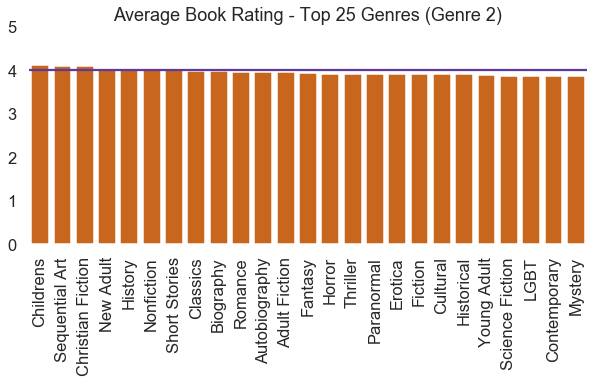

In [46]:
top_25_genre_2_pv = data_top_25_genre_2.pivot_table('book_average_rating', index='genre_2', 
                                                    aggfunc='mean').sort_values(by='book_average_rating', ascending=False)

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x=top_25_genre_2_pv.index, 
            y=top_25_genre_2_pv['book_average_rating'], 
            data=top_25_genre_2_pv,
            color='#E66100',
            ax=ax)

ax.axhline(y=4, color='#5D3A9B')

# just want to rotate the xticks and not work on labels
plt.xticks(rotation=90)

ax.set(
    title='Average Book Rating - Top 25 Genres (Genre 2)',
    xlabel='',
    ylabel='',
    ylim=(0, 5)
)

for key, spine in ax.spines.items():
    spine.set_visible(False)

# Data Analyis: Correlations 

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


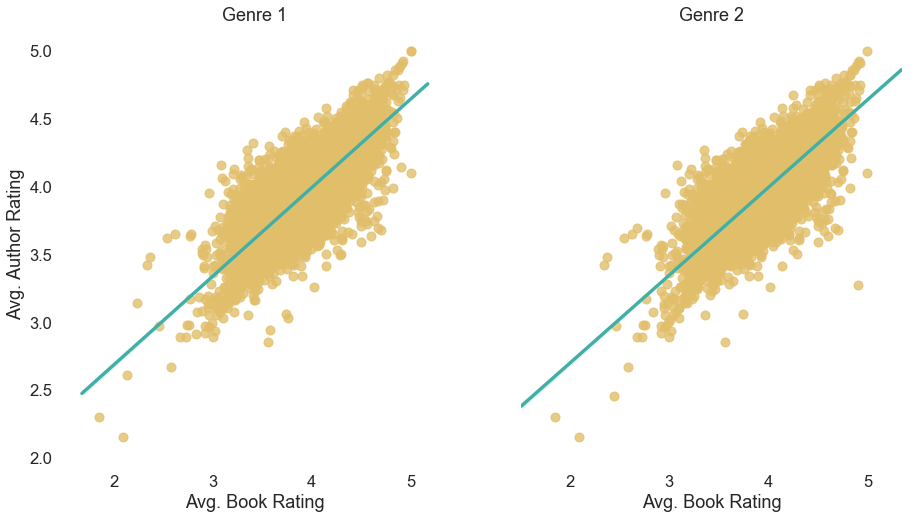

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(15,8))

sns.regplot(x="book_average_rating", 
            y="author_average_rating", 
            data=data_top_25_genre_1, 
            color='#E1BE6A',
            line_kws={'color': '#40B0A6'},
            ax=ax1
)

ax1.set_title('Genre 1')
ax1.set_xlabel('Avg. Book Rating')
ax1.set_ylabel('Avg. Author Rating')

for key, spine in ax1.spines.items():
    spine.set_visible(False)

sns.regplot(x="book_average_rating", 
            y="author_average_rating", 
            data=data_top_25_genre_2, 
            color='#E1BE6A',
            line_kws={'color':'#40B0A6'},
            ax=ax2
)

ax2.set_title('Genre 2')
ax2.set_xlabel('Avg. Book Rating')
ax2.set_ylabel('')

for key,spine in ax2.spines.items():
    spine.set_visible(False)

# Data Analysis: Conclusion

# Thanks for reading! 